In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/charging_sessions.csv")

In [ ]:
# Konvertierung von Zeitstempeln in datetime
df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])

# Sortieren nach Zeitstempel
df = df.sort_values(by='connectionTime')

# Fehlende Werte interpolieren
window_size = 30  # Größe des rollenden Fensters (Anzahl der Tage)
df_interpolated = df.interpolate(method='linear', limit_direction='both', axis=0)

# Überprüfen der interpolierten Daten
print(df_interpolated.head())

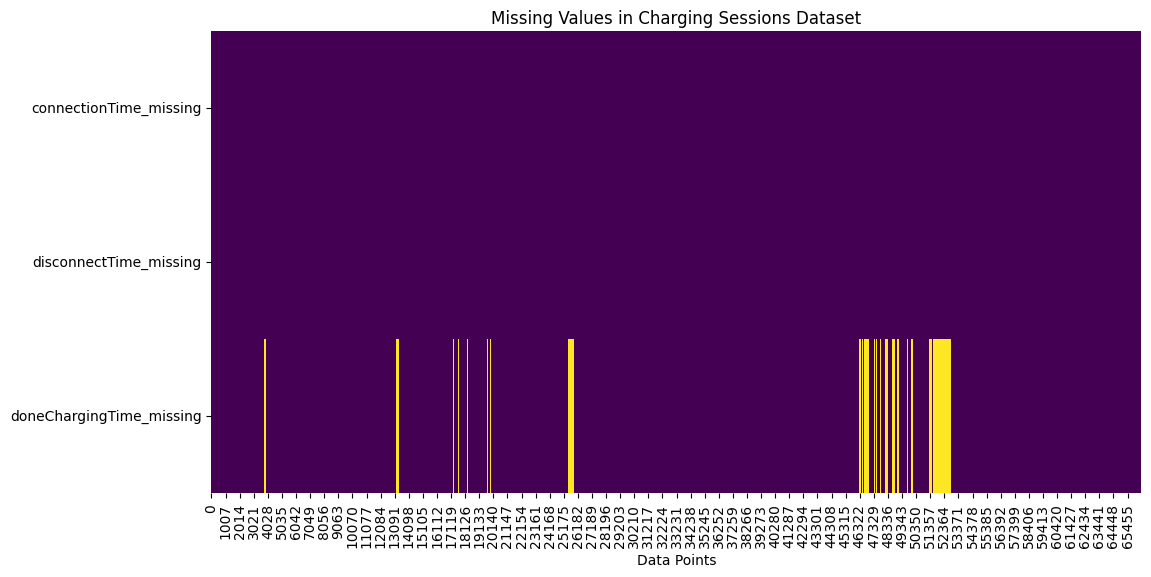

In [6]:
missing_data_df = pd.DataFrame(index=df.index)

# Add columns indicating missing values
missing_data_df['connectionTime_missing'] = df['connectionTime'].isnull()
missing_data_df['disconnectTime_missing'] = df['disconnectTime'].isnull()
missing_data_df['doneChargingTime_missing'] = df['doneChargingTime'].isnull()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data_df.T, cmap='viridis', cbar=False)
plt.title('Missing Values in Charging Sessions Dataset')
plt.xlabel('Data Points')
plt.yticks(rotation=0)
plt.show()